In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_recall_curve, precision_score, recall_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Binarizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


import warnings
warnings.filterwarnings('ignore')

# 오차행렬 (Confusion Matrix)

**오차행렬**은 분류 문제에서 모델의 성능을 평가하기 위해 사용되는 도구로, 실제 값과 예측 값을 비교하여 결과를 표로 나타냅니다. 특히 이진 분류와 다중 클래스 분류 문제에서 유용하게 사용됩니다.


|               | 예측 Positive | 예측 Negative |
|---------------|---------------|---------------|
| **실제 Positive** | True Positive (TP) | False Negative (FN) |
| **실제 Negative** | False Positive (FP) | True Negative (TN) |

---

## 주요 용어

- **True Positive (TP):** 실제 값이 Positive이고, 모델이 이를 올바르게 Positive로 예측한 경우.
- **True Negative (TN):** 실제 값이 Negative이고, 모델이 이를 올바르게 Negative로 예측한 경우.
- **False Positive (FP):** 실제 값은 Negative인데, 모델이 이를 잘못 Positive로 예측한 경우 (제1종 오류).
- **False Negative (FN):** 실제 값은 Positive인데, 모델이 이를 잘못 Negative로 예측한 경우 (제2종 오류).

## 오차행렬에서 도출되는 주요 지표

오차행렬 값을 바탕으로 여러 평가 지표를 계산할 수 있습니다:

1. **정확도 (Accuracy):**  
   전체 데이터에서 올바르게 예측된 비율.   
    ${Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$

2. **정밀도 (Precision):**  
   Positive로 예측한 것 중 실제 Positive의 비율.
   스팸메일 여부    
   ${Precision} = \frac{TP}{TP + FP}$

4. **재현율 (Recall, Sensitivity):**  
   실제 Positive 중에서 올바르게 Positive로 예측된 비율.
   실제 Positive 양성 데이터를 Negtive로 잘못 판단, 암 판단 모델, 금융 사기 적발 모델   
   ${Recall} = \frac{TP}{TP + FN}$

5. **특이도 (Specificity):**  
   실제 Negative 중에서 올바르게 Negative로 예측된 비율.

   ${Specificity} = \frac{TN}{TN + FP}$

6. **F1-점수 (F1-Score):**  
   정밀도와 재현율의 조화평균으로, 두 지표 간의 균형을 나타냄.
    ${F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$


## 오차행렬 시각화

오차행렬은 `matplotlib` 또는 `seaborn` 라이브러리를 사용해 히트맵(heatmap) 형태로 시각화할 수 있습니다.

```python
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# 예시: 실제 값과 예측 값
y_true = [1, 0, 1, 1, 0, 1, 0, 0, 1, 0]
y_pred = [1, 0, 1, 0, 0, 1, 0, 0, 1, 1]

# 오차행렬 생성
cm = confusion_matrix(y_true, y_pred)

# 히트맵 시각화
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['예측 Negative', '예측 Positive'], 
            yticklabels=['실제 Negative', '실제 Positive'])
plt.ylabel('실제 값')
plt.xlabel('예측 값')
plt.title('오차행렬')
plt.show()



In [57]:
df = pd.read_csv('https://raw.githubusercontent.com/doeungim/algoboni/refs/heads/main/1-1_titanic.csv') 

# 전처리 함수 

def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행.
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

df2 = transform_features(df)

X = df2.drop(columns = 'Survived')
y = df['Survived']
X_train, X_test, y_train, y_test=train_test_split(X, y,test_size=0.2, random_state=0)

# solver = liblinear : 회귀의 최적화 알고리즘 유형을 지정 
lr = LogisticRegression(solver = 'liblinear')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# 정밀도, 재현율이 특별히 강조되어야하는 경우, 결정 임계값을 조정 - predict_proba()
pred_proba = lr.predict_proba(X_test)
pred_proba1 = pred_proba[:,1].reshape(-1,1)

# Binarizer : threshold 보다 같거나 작으면 0, 크면 1 
custom_threshold = 0.5
binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba1)
custom_predict = binarizer.transform(pred_proba1)

In [58]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix

def get_clf_eval(y_test, pred) : 
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print(confusion)
    print('Accuracy : {0:.4f}, 정밀도: {1:.4f} , 재현율 : {2:.4f}'.format(accuracy, precision, recall))

get_clf_eval(y_test, custom_predict)

[[93 17]
 [20 49]]
Accuracy : 0.7933, 정밀도: 0.7424 , 재현율 : 0.7101


In [59]:
# 여러개의 분류 결정 임계값 변경 
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60] 

def get_clf_eval_by_threshold(y_test, pred_proba_c1, thresholds) : 
    for values in thresholds : 
        binar = Binarizer(threshold = values).fit(pred_proba_c1)
        custom_predict = binar.transform(pred_proba_c1)
        get_clf_eval(y_test, custom_predict)

get_clf_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1) , thresholds)

[[87 23]
 [14 55]]
Accuracy : 0.7933, 정밀도: 0.7051 , 재현율 : 0.7971
[[91 19]
 [18 51]]
Accuracy : 0.7933, 정밀도: 0.7286 , 재현율 : 0.7391
[[93 17]
 [20 49]]
Accuracy : 0.7933, 정밀도: 0.7424 , 재현율 : 0.7101
[[98 12]
 [23 46]]
Accuracy : 0.8045, 정밀도: 0.7931 , 재현율 : 0.6667
[[101   9]
 [ 26  43]]
Accuracy : 0.8045, 정밀도: 0.8269 , 재현율 : 0.6232


### **ROC curve & AUC** 
## 1. ROC 곡선이란?

- **ROC (Receiver Operating Characteristic) 곡선**은 분류 모델의 성능을 다양한 임곗값(threshold)에서 시각적으로 표현한 그래프입니다.
- 모델이 두 클래스를 얼마나 잘 구분하는지 평가할 때 사용됩니다.
- 그래프의 축:
  - **Y축**: **True Positive Rate (TPR)** (민감도 또는 재현율)
  - **X축**: **False Positive Rate (FPR)**
- 민감도(TPR)은 실제값 Positive가 정확히 예측돼야 하는 수준   
- 특이성(TNR)은 실제값 Negative가 정확히 예측되어야 하는 수준 

### 주요 지표:
- **True Positive Rate (TPR)**: 민감도(Sensitivity) 또는 재현율(Recall)이라고도 함.
  $TPR = \frac{TP}{TP + FN}$
- **False Positive Rate (FPR)**:
  $FPR = \frac{FP}{FP + TN}$

## 2. ROC 곡선 해석

- **완벽한 분류기**는 (0, 1) 지점에 위치하며, 이는 FPR = 0(거짓 양성 없음)이고 TPR = 1(모든 참 양성 포함)을 의미합니다.
- 곡선이 왼쪽 상단 코너에 가까울수록 모델의 성능이 더 우수합니다.
- **무작위 분류기**는 (0, 0)에서 (1, 1)로 이어지는 대각선을 나타내며, 클래스 구분 능력이 없음을 의미합니다.

---

## 3. AUC란?

- **AUC (Area Under the Curve)**는 모델이 양성 클래스와 음성 클래스를 얼마나 잘 구분하는지 나타내는 지표입니다.
- ROC 곡선 아래의 면적으로, 0에서 1 사이의 값을 가집니다.

### AUC 해석:
- **AUC = 1.0**: 완벽한 분류기
- **AUC = 0.5**: 무작위 분류기 (예측력이 없음)
- **AUC < 0.5**: 무작위보다 나쁨 (모델이 반대로 작동)

### AUC 값에 따른 성능 기준:
- **0.90 - 1.0**: 우수함
- **0.80 - 0.90**: 좋음
- **0.70 - 0.80**: 보통
- **0.60 - 0.70**: 약함
- **0.50 - 0.60**: 성능이 나쁨

---

## 4. Python에서 ROC 곡선과 AUC 계산 및 시각화

```python
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 예제: 실제 레이블과 예측 확률
y_true = [0, 0, 1, 1]
y_scores = [0.1, 0.4, 0.35, 0.8]

# ROC 곡선과 AUC 계산
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# ROC 곡선 시각화
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # 무작위 예측선
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


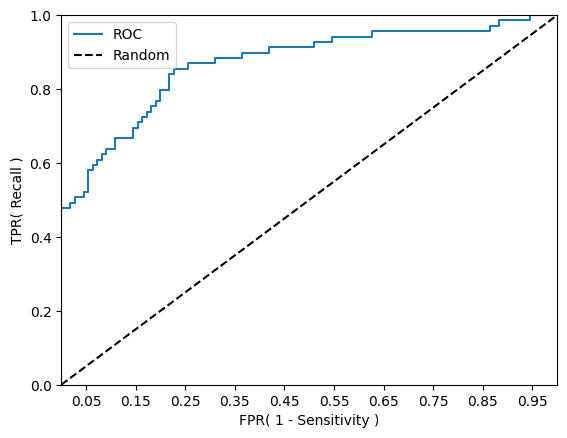

In [60]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Labeal = 1일때 예측 확률을 추출 
prob1 = lr.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, prob1)

def roc_curve_plot(y_test , pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음. 
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    # ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
    # 가운데 대각선 직선을 그림. 
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등   
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, lr.predict_proba(X_test)[:, 1] )



### **Logistic Classification 예제** 
### **Logistic 장단점** 
- 장점 : 선형회귀분석 만큼 구현하기 용이, 계수(기울기)를 사용해 각 변수의 중요성을 쉽게 파악
- 단점 : 선형관계가 아닌 데이터에 대한 예측력이 떨어짐 

In [61]:
import pandas as pd
file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/titanic.csv'
df= pd.read_csv(file_url)

In [62]:
# 1) Describe()
print(df.describe())
print("")
print("""1) Pclass 의 경우에는 1,2,3으로 구성
2) Age은 평균 29였다가 75%가 35였다가 max가 80으로 증가, 대부분 젊은 층이지만 나이든 탑승객 존재
3) Sibsp 와Parch 의 25%, 75%가 모두 0 = 대부분 승객이 가족을 동반하지 않고 혼자 탑승 """)

           Pclass         Age       SibSp       Parch    Survived
count  889.000000  889.000000  889.000000  889.000000  889.000000
mean     2.311586   29.315152    0.524184    0.382452    0.382452
std      0.834700   12.984932    1.103705    0.806761    0.486260
min      1.000000    0.420000    0.000000    0.000000    0.000000
25%      2.000000   22.000000    0.000000    0.000000    0.000000
50%      3.000000   28.000000    0.000000    0.000000    0.000000
75%      3.000000   35.000000    1.000000    0.000000    1.000000
max      3.000000   80.000000    8.000000    6.000000    1.000000

1) Pclass 의 경우에는 1,2,3으로 구성
2) Age은 평균 29였다가 75%가 35였다가 max가 80으로 증가, 대부분 젊은 층이지만 나이든 탑승객 존재
3) Sibsp 와Parch 의 25%, 75%가 모두 0 = 대부분 승객이 가족을 동반하지 않고 혼자 탑승 


<Axes: >

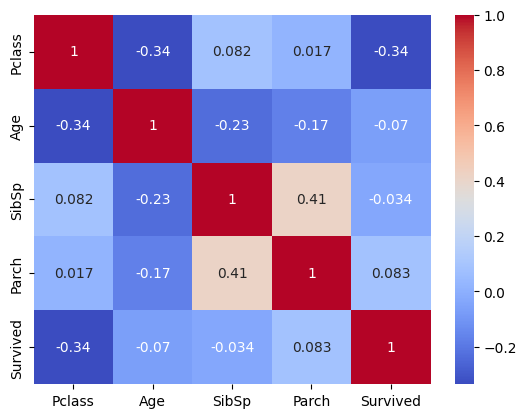

In [63]:
# 2) Correlation
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(df.select_dtypes(exclude = 'object').corr(), cmap ='coolwarm', annot = True)

In [64]:
# 3) 전처리 

# Name 과 Ticket Drop 
df1 = df.drop(columns = ['Name', 'Ticket'], axis = 1)

# sex, embarked >> get_dummies 
df2 = pd.get_dummies(df1 , columns = ['Sex','Embarked'] , drop_first = True, dtype = 'int') 


In [69]:
# 4) 최적의 모델 찾기 
X = df2.drop(columns = ['Survived'])
y = df2['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1234)

models = {
'dt_clf' : DecisionTreeClassifier(random_state=11),
'rf_clf' : RandomForestClassifier(random_state=11),
'lr_clf' : LogisticRegression(solver='liblinear') }

res = []
for name, model in models.items() : 
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    confusion  = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)

    roc_auc = roc_auc_score(y_test, pred)
    res.append([name, confusion , accuracy, precision, recall, f1])

pd.DataFrame(res, columns =['model', 'confusion' , 'accuracy', 'precision', 'recall', 'f1'] )

,model,confusion,accuracy,precision,recall,f1
0,dt_clf,"[[135, 23], [31, 78]]",0.797753,0.772277,0.715596,0.742857
1,rf_clf,"[[139, 19], [31, 78]]",0.812734,0.804124,0.715596,0.757282
2,lr_clf,"[[140, 18], [38, 71]]",0.790262,0.797753,0.651376,0.717172


In [75]:
# Random_Forest 
from sklearn.model_selection import GridSearchCV, cross_val_score

rf = RandomForestClassifier(random_state= 1234)

parameters = {
    'max_depth': [2,3,5,10] ,
    'min_samples_split' : [2,3,4],
    'min_samples_leaf': [2,3,5]   
}

rf_grid = GridSearchCV(rf, parameters, scoring = 'accuracy', cv = 5)
rf_grid.fit(X_train, y_train)

best_rf_model = rf_grid.best_estimator_

rf_pred = best_rf_model.predict(X_test)

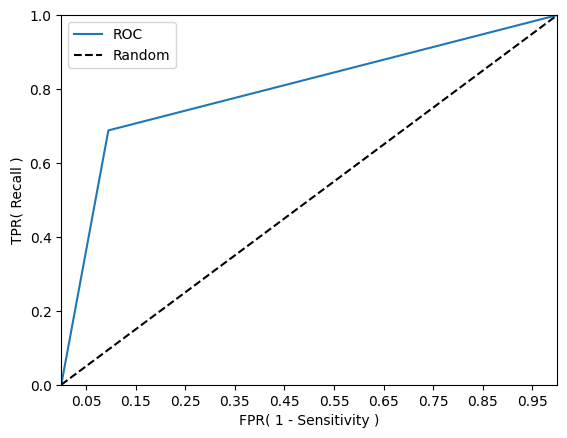

ROC AUC 값: 0.7965683428173267


In [82]:
fpr, tpr, thresholds = roc_curve(y_test, rf_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr , tpr, label='ROC')
    # 가운데 대각선 직선을 그림. 
plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등   
start, end = plt.xlim()
plt.xticks(np.round(np.arange(start, end, 0.1),2))
plt.xlim(0,1); plt.ylim(0,1)
plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
plt.legend()
plt.show()

print('ROC AUC 값:', roc_auc_score(y_test, rf_pred))